In [1]:
import mmengine
import mmcv
from mmcv.transforms import Compose, Resize
import matplotlib.pyplot as plt
from mmdet.utils import get_test_pipeline_cfg
import torch
import numpy as np
import torchvision.transforms as torch_trans

In [2]:
from mmdet.apis import init_detector, inference_detector 
from wrappers import *

In [30]:
model_path = "configs/frcn/frcn_on_augmented_data.py"
ckpt_path = "weights/best_bbox_mAP_epoch_28.pth"
model = init_detector(model_path, ckpt_path)


Loads checkpoint by local backend from path: weights/best_bbox_mAP_epoch_28.pth


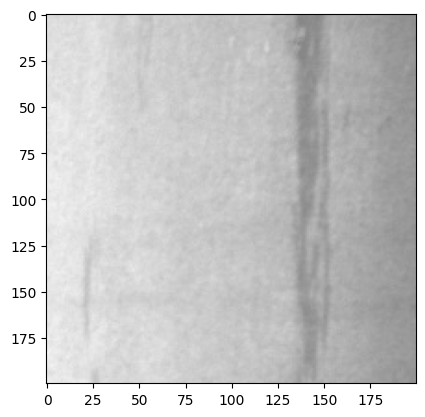

In [4]:
img = mmcv.imread("data/NEU_DET/test/inclusion_248.jpg")
plt.imshow(img)

In [5]:
test_pipeline = get_test_pipeline_cfg(model.cfg)[:-2]
transforms = Compose(test_pipeline)
transforms

Compose(
    LoadImageFromFile(ignore_empty=False, to_float32=False, color_type='color', imdecode_backend='cv2', backend_args=None)
    Resize(scale=(1333, 800), scale_factor=None, keep_ratio=True, clip_object_border=True), backend=cv2), interpolation=bilinear)
    Normalize(mean=[103.53  116.28  123.675], std=[1. 1. 1.], to_rgb=False)
    Pad(size=None, size_divisor=32, pad_to_square=False, pad_val={'img': 0, 'seg': 255}), padding_mode=constant)
    Resize(scale=(1333, 800), scale_factor=None, keep_ratio=True, clip_object_border=True), backend=cv2), interpolation=bilinear)
)

In [6]:
data_ = dict(img=img, img_id=0)
img_trans = transforms(data_)
plt.imshow(img_trans['img'].astype(np.uint8))


KeyError: 'img_path'

In [31]:
img = mmcv.imread("data/NEU_DET/test/inclusion_290.jpg")

In [32]:
results = inference_detector(model, img)

In [33]:
results.keys()

['ignored_instances', 'pred_instances', 'gt_instances']

In [34]:
results.pred_instances

<InstanceData(

    META INFORMATION

    DATA FIELDS
    bboxes: tensor([[ 15.1281,   0.0000, 796.4548, 800.0000],
                [346.3521,  47.4564, 800.0000, 560.9507],
                [276.5382, 190.4697, 800.0000, 787.0715],
                [ 18.5544,  29.4253, 566.9722, 489.7744],
                [507.3333,  94.8275, 800.0000, 441.8345]], device='cuda:0')
    labels: tensor([3, 3, 3, 3, 3], device='cuda:0')
    scores: tensor([0.6452, 0.1535, 0.0945, 0.0931, 0.0639], device='cuda:0')
) at 0x7f9b2cbef340>

In [10]:
from mmdet.visualization import DetLocalVisualizer

In [11]:
vis = DetLocalVisualizer()

In [54]:
img_t = torch.from_numpy(img).permute(2,0,1).unsqueeze(0).cpu()
img_t.shape

torch.Size([1, 3, 200, 200])

In [55]:
# res =  torch_trans.Resize((1333,800), keep_ratio=True)
# trans = Compose([res])
img_r =torch_trans.Resize((1333,800))(img_t)[0].permute(1,2,0).numpy()
img_r.shape

/home/huemorgen/miniconda3/envs/mmlab/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


(1333, 800, 3)

In [56]:
palette = [(220, 20, 60), (119, 11, 32), (0, 0, 142), (0, 0, 230), (0, 200, 30), (100, 200, 150)]
output = vis._draw_instances(img_r, results.pred_instances, classes=(1,2,3,4,5,6), palette=palette)

/home/huemorgen/miniconda3/envs/mmlab/lib/python3.8/site-packages/mmengine/visualization/visualizer.py:760: UserWarning: Warning: The bbox is out of bounds, the drawn bbox may not be in the image
  warnings.warn(
/home/huemorgen/miniconda3/envs/mmlab/lib/python3.8/site-packages/mmengine/visualization/visualizer.py:831: UserWarning: Warning: The polygon is out of bounds, the drawn polygon may not be in the image
  warnings.warn(


TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

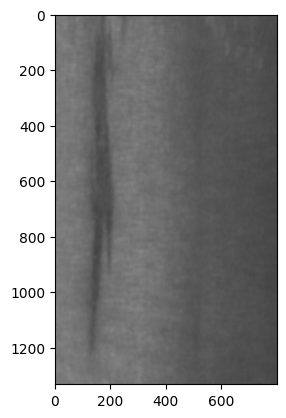

In [ ]:
plt.imshow(output)